This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame.

In [65]:
import pandas as pd

#Pandas function to read csv files into dataframes
df = pd.read_csv("train.csv")

#Pandas function to display statistics of dataframe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value 

In [66]:
def num_nans(df):
    return df.isnull().any(axis=1).sum() #Returns number of rows with null values in them 

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values 

In [67]:
def drop_na(df):
    return df[df.columns[df.isnull().sum() <= 200]] #Returns only columns with less than 200 NaN values

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1

In [68]:
def to_numerical(df):
    return df.Sex.replace(['male', 'female'], [0, 1]) #Replaces 'male' with 0 and 'female' with 1

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [69]:
import numpy as np

def extract_names(df):
    
    #To extract Last Name
    df["Last Name"] = df["Name"].str.split(",").str.get(0)
    
    #To extract Title
    df["Title"] = df["Name"].str.split(",").str.get(1).str.split(".").str.get(0)
    
    #To extract First Name
    df["First Name"] = df["Name"].str.split(",").str.get(1).str.split(" ").str.get(2)
    #To remove paranthesis in First Names
    df['First Name'].replace(regex='\(.*',value= df['First Name'].str[1:], inplace = True)
    
    #To extract Middle Names
    df["Middle Name"] = df["Name"].str.split(",").str.get(1).str.split(" ").str.get(3)
    #To remove dirty data
    df['Middle Name'].replace(regex='\(.*',value= np.nan, inplace = True)
    #To remove paranthesis in Middle Names
    df['Middle Name'].replace(regex='.*\)',value= df['Middle Name'].str[:-1], inplace = True)
    return df[['First Name', 'Middle Name', 'Last Name', 'Title']]

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


f) Write a function that replaces all missing ages with the average age 

In [70]:
def replace_with_mean(df):
    return df['Age'].fillna((df['Age'].mean())) #Fills NaN cells in Age with mean 

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. 

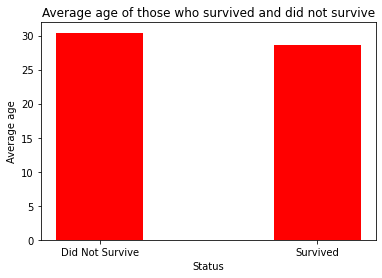

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

#Group by 'Survived' and get mean age of each group
plt.bar(['Did Not Survive', 'Survived'],df.groupby('Survived').Age.mean().to_list(), color ='red', width = 0.4)
plt.xlabel("Status")
plt.ylabel("Average age")
plt.title("Average age of those who survived and did not survive")
plt.show()

> The average age of the survivors is about 28 while the average age of those who did not survive is about 30.
> It can be inferred that young people had a higher chance of survival.

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. 

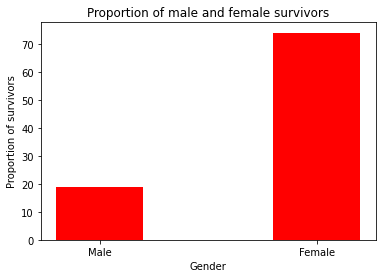

In [72]:
plt.bar(['Male', 'Female'],[len(df[(df.Sex==False) & (df.Survived==True)])/len(df[df.Sex==False]) * 100,len(df[(df.Sex==True) & (df.Survived==True)])/len(df[df.Sex==True]) * 100], color ='red',
        width = 0.4) #Survivors (per gender) / Total (of the gender) = proportion of survivors (per gender)
plt.xlabel("Gender")
plt.ylabel("Proportion of survivors")
plt.title("Proportion of male and female survivors")
plt.show()

>About 18 percent of the men onboard survived.
>About 72 percent of the women onboard survived.
>It can be inferred that females had a higher chance of survival compared to men.

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. 

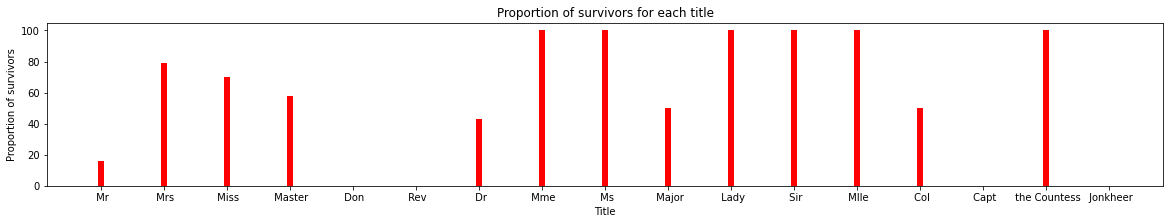

In [74]:
proportions=[]
for title in df.Title.unique():
    proportions.append(len(df[(df.Title==title) & (df.Survived==True)])/len(df[df.Title==title]) * 100)

plt.bar(df.Title.unique(),proportions, color ='red', width = 0.1)
plt.xlabel("Title")
plt.ylabel("Proportion of survivors")
plt.title("Proportion of survivors for each title")
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

>The higher rankings such as 'Mme','Lady' and 'Sir' had a better chance of survival then titles such as 'Mr','Mrs' and 'Master'.
>Men with the lowest ranking 'Mr' had the worst chance of survival while their wives and children ('Mrs' and 'Miss'/'master' had a better chance.

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. 

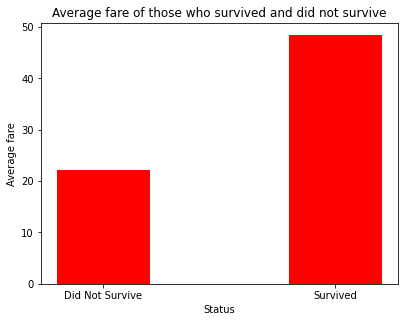

In [75]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

#Group by 'Survived' and get mean fare of each group
plt.bar(['Did Not Survive', 'Survived'],df.groupby('Survived').Fare.mean().to_list(), color ='red',
        width = 0.4)
plt.xlabel("Status")
plt.ylabel("Average fare")
plt.title("Average fare of those who survived and did not survive")
plt.show()

>The average fare paid by the people who survived is about 48.
>The average fare paid by the people who did not survive is about 22.
>It can be inferred that people who paid a higher fare, had a higher chance of survival.

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe.

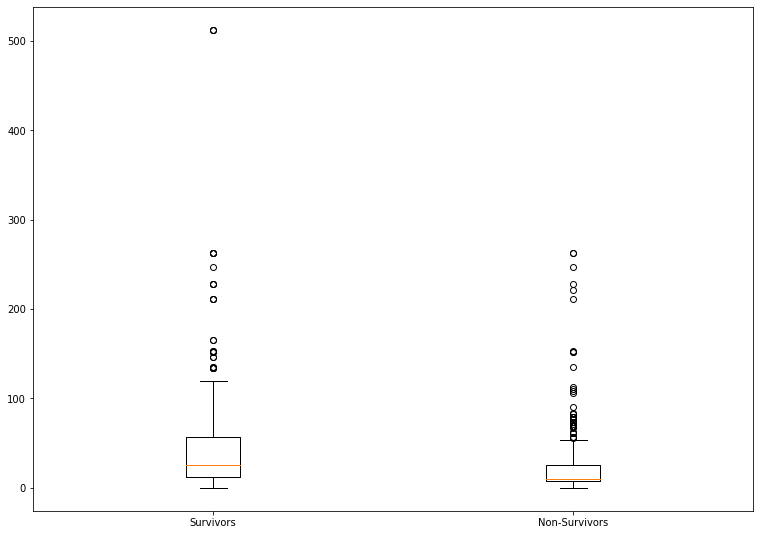

In [76]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Survivors', 'Non-Survivors'])
 
#Get Fare data by 'Surived'
bp = ax.boxplot([df[df.Survived==True].Fare, df[df.Survived==False].Fare])
plt.show()

>The median fare of the survivors is higher than that of those who did not survive.
>There are a few people who paid huge prices for tickets and did not survive (Outliers on the second plot). 
>One person paid 500 for a ticket which is significantly higher than any other fare.

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation 

In [77]:
def fare(df):
    df['Fare'] = abs(df['Fare'] - df['Fare'].mean()) / df['Fare'].std() #Z-score normalization for Fare
    return df['Fare']

df['Fare'] = fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0.502163,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0.488580,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0.486064,S,Allen,Mr,William,Henry


l) Remove all non-numerical columns from the dataframe. 

In [78]:
Names = df['Name'].to_list()
df = df.select_dtypes(['number']) #Removes non-numerical columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

m) Ignoring passenger ID, write a function that returns the names of the N most similar passengers using the euclidean distance? 

In [79]:
from scipy.spatial.distance import cdist
import numpy as np

def N_most_similar(df, N):
    
    similarIndices = [] #To store indices of similar pairs
    similarPairs=[]
    dist_matrix = cdist(df, df, 'euclid') #To calculate distance matrix
    dist_matrix[np.isnan(dist_matrix)] = 0
    np.fill_diagonal(dist_matrix,np.amax(dist_matrix) ) #To fill diagonal values with max value
    
    while(len(similarIndices) < 2 * N):
        ind = np.unravel_index(np.argmin(dist_matrix, axis=None), dist_matrix.shape) #Find min distance
        
        if ind not in similarIndices and ind[::-1] not in similarIndices:
            similarIndices.append(ind)
            similarIndices.append(ind[::-1]) 
            similarPairs.append(Names[ind[0]])
            similarPairs.append(Names[ind[1]])
            
        dist_matrix[ind] = np.amax(dist_matrix) #Set min distance to max so as not to take into account again
        
    return similarPairs

print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

The 3 most similar passengers are: ['McGovern, Miss. Mary', 'Mockler, Miss. Helen Mary "Ellie"', 'Berriman, Mr. William John', 'Troupiansky, Mr. Moses Aaron', 'Ivanoff, Mr. Kanio', 'Nankoff, Mr. Minko']


## Exercise 2 

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. 

In [80]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

list = ["Python", "Data Science", "Data Analysis","Machine Learning", "Deep Learning"] #List of Topics

python = get(list[0])
data_science = get(list[1])
data_analysis = get(list[2])
machine_learning = get(list[3])
deep_learning = get(list[4])

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. 

In [81]:
from pandas.io.json import json_normalize

def normalize(df):
    return json_normalize(df['items'])

#To convert to dataframes
python = normalize(python)
data_science = normalize(data_science)
data_analysis = normalize(data_analysis)
machine_learning = normalize(machine_learning)
deep_learning = normalize(deep_learning)

#To save the dataframes
python.to_csv('python.csv')
data_science.to_csv('dataScience.csv')
data_analysis.to_csv('dataAnalysis.csv')
machine_learning.to_csv('machineLearning.csv')
deep_learning.to_csv('deepLearning.csv')

c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. 

In [82]:
python.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
data_science.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
data_analysis.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
machine_learning.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
deep_learning.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)

d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. 

In [83]:
python['Topic'] = "Python"
data_science['Topic'] = "Data Science"
data_analysis['Topic'] = "Data Analysis"
machine_learning['Topic'] = "Machine Learning"
deep_learning['Topic'] = "Deep Learning"

#To concat all the dataframes together
merged = pd.concat([python, data_science, data_analysis, machine_learning, deep_learning], axis=0, sort = True, ignore_index = True)
merged.to_csv("merged.csv")

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). 

In [84]:
def dataInTitle(df):
    return df[df.Title.str.contains('Data', case = False)] #Returns all rows with 'Data' in title

df = dataInTitle(merged)
df.head()

,Authors,Title,Topic,accessInfo.accessViewStatus,accessInfo.country,accessInfo.embeddable,accessInfo.epub.acsTokenLink,accessInfo.epub.isAvailable,accessInfo.pdf.acsTokenLink,accessInfo.pdf.isAvailable,...,volumeInfo.panelizationSummary.containsEpubBubbles,volumeInfo.panelizationSummary.containsImageBubbles,volumeInfo.previewLink,volumeInfo.printType,volumeInfo.publishedDate,volumeInfo.publisher,volumeInfo.ratingsCount,volumeInfo.readingModes.image,volumeInfo.readingModes.text,volumeInfo.subtitle
10,"[Hadley Wickham, Garrett Grolemund]",R for Data Science,Data Science,SAMPLE,US,True,NaN,False,NaN,False,...,False,False,http://books.google.com/books?id=vfi3DQAAQBAJ&...,BOOK,2016-12-12,"""O'Reilly Media, Inc.""",3.0,True,False,"Import, Tidy, Transform, Visualize, and Model ..."
11,"[John D. Kelleher, Brendan Tierney]",Data Science,Data Science,SAMPLE,US,True,NaN,False,NaN,False,...,False,False,http://books.google.com/books?id=TFpVDwAAQBAJ&...,BOOK,2018-04-13,MIT Press,1.0,True,False,NaN
12,[Rafael A. Irizarry],Introduction to Data Science,Data Science,SAMPLE,US,True,http://books.google.com/books/download/Introdu...,True,http://books.google.com/books/download/Introdu...,True,...,False,False,http://books.google.com/books?id=xb29DwAAQBAJ&...,BOOK,2019-11-20,CRC Press,NaN,True,True,Data Analysis and Prediction Algorithms with R
13,[Jake VanderPlas],Python Data Science Handbook,Data Science,SAMPLE,US,True,NaN,True,NaN,True,...,False,False,http://books.google.com/books?id=6omNDQAAQBAJ&...,BOOK,2016-11-21,"""O'Reilly Media, Inc.""",1.0,True,True,Essential Tools for Working with Data
14,[Joel Grus],Data Science from Scratch,Data Science,SAMPLE,US,True,NaN,False,NaN,False,...,False,False,http://books.google.com/books?id=JYodCAAAQBAJ&...,BOOK,2015-04-14,"""O'Reilly Media, Inc.""",4.0,True,False,First Principles with Python


f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` 

In [85]:
def func(df):
    df['Authors'] = (df['Authors'] .transform(lambda x: ",".join(map(str,x)))) #Converts list of authors to string
    return df[df['Authors'].astype(str).str.contains('\\b'+ "E" +'[^\.]\w+',regex=True) == True] #Finds authors with 'E' in their first or last names
  
df = func(merged)
df.head()

,Authors,Title,Topic,accessInfo.accessViewStatus,accessInfo.country,accessInfo.embeddable,accessInfo.epub.acsTokenLink,accessInfo.epub.isAvailable,accessInfo.pdf.acsTokenLink,accessInfo.pdf.isAvailable,...,volumeInfo.panelizationSummary.containsEpubBubbles,volumeInfo.panelizationSummary.containsImageBubbles,volumeInfo.previewLink,volumeInfo.printType,volumeInfo.publishedDate,volumeInfo.publisher,volumeInfo.ratingsCount,volumeInfo.readingModes.image,volumeInfo.readingModes.text,volumeInfo.subtitle
16,"Ryan A. Estrellado,Emily A. Freer,Jesse Mostip...",Data Science in Education Using R,Data Science,SAMPLE,US,True,http://books.google.com/books/download/Data_Sc...,True,http://books.google.com/books/download/Data_Sc...,True,...,False,False,http://books.google.com/books?id=UG76DwAAQBAJ&...,BOOK,2020-10-26,Routledge,NaN,True,True,NaN
33,Ethem Alpaydin,Introduction to Machine Learning,Machine Learning,SAMPLE,US,True,NaN,False,NaN,False,...,NaN,NaN,http://books.google.com/books?id=NP5bBAAAQBAJ&...,BOOK,2014-08-29,MIT Press,2.0,True,False,NaN
34,Ethem Alpaydin,Machine Learning,Machine Learning,SAMPLE,US,True,NaN,False,NaN,False,...,False,False,http://books.google.com/books?id=AGQ4DQAAQBAJ&...,BOOK,2016-10-07,MIT Press,1.0,True,False,The New AI
46,Eugene Charniak,Introduction to Deep Learning,Deep Learning,SAMPLE,US,True,NaN,False,NaN,False,...,False,False,http://books.google.com/books?id=LrT4DwAAQBAJ&...,BOOK,2019-01-29,MIT Press,1.0,True,False,NaN
